In [1]:
# 데이터 구성: Series, DataFrame
import pandas as pd
import numpy as np


#탐색적 분석을 위한 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale,minmax_scale,robust_scale
from scipy.stats import shapiro

#ARIMA
from statsmodels.tsa.arima_model import ARIMA



#matplotlib 이용한 background 그래프 실행 및 결과 확인 
%matplotlib inline


#export_graphviz: 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
#graphviz: 나무 구조 시각화(.dot 확장자 파일 불러오기 등)
import graphviz


# 데이터 분할: train,test
from sklearn.model_selection import train_test_split

#데이터 scaling => 거리기반 알고리즘은 필수!!!
from sklearn.preprocessing import StandardScaler
# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
# 분류 DT
from sklearn.tree import DecisionTreeClassifier
#분류  RF
from sklearn.ensemble import RandomForestClassifier
# 분류 GB
from sklearn.ensemble import GradientBoostingClassifier
# 분류 SVM
from sklearn.svm import SVC
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 분류 NN
from sklearn.neural_network import MLPClassifier

# 최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가 
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# 한글 폰트 적용
font_path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family = font_name)

In [3]:
# 결과 창 확대
pd.set_option('display.max_rows', 100000000000) # 최대 줄 수 설정
pd.set_option('display.max_columns', 100000000000) # 최대 열 수 설정 
pd.set_option('display.width', 1000) # 표시할 가로의 길이

## 데이터 받아오기

In [6]:
# 데이터 구성하기(MFG_TAT)
MFG_TAT = pd.read_csv("/home/pirl/빅데이터 프로젝트/cleansing/outlier/MFG_TAT_NULL_COL_OUT.csv", engine="python",encoding='EUC-KR')
#MFG_TAT = MFG_TAT.drop(MFG_TAT.columns[0], axis=1)

# MERGE

In [7]:
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074


In [8]:
MFG_TAT['TAT_1BLACK'] = MFG_TAT['TAT_1BLACK_1PRINT']+MFG_TAT['TAT_1BLACK_2RTD']

In [9]:
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,TAT_1BLACK
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074,306
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075,296
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645,298
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076,296
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074,296


In [10]:
MFG_TAT['TAT_2AG'] = MFG_TAT['TAT_2AG_1PRINT']+MFG_TAT['TAT_2AG_2RTD']+MFG_TAT['TAT_2AG_3EXPOSURE']
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,TAT_1BLACK,TAT_2AG
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074,306,317
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075,296,305
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645,298,295
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076,296,331
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074,296,285


In [11]:
MFG_TAT['TAT_3BUS'] = MFG_TAT['TAT_3BUS_1DEVELOP']+MFG_TAT['TAT_3BUS_2FIRE']
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,TAT_1BLACK,TAT_2AG,TAT_3BUS
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074,306,317,7316
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075,296,305,7065
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645,298,295,7115
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076,296,331,7553
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074,296,285,7907


In [12]:
MFG_TAT['TAT_4DIELEC'] = MFG_TAT['TAT_4DIELEC_FIRE']
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,TAT_1BLACK,TAT_2AG,TAT_3BUS,TAT_4DIELEC
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074,306,317,7316,6447
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075,296,305,7065,6600
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645,298,295,7115,6597
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076,296,331,7553,6420
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074,296,285,7907,6453


In [13]:
MFG_TAT['TAT_6PHOS'] = MFG_TAT['TAT_6PHOS_1R_1DISPENSER']+MFG_TAT['TAT_6PHOS_1R_2DRY']+MFG_TAT['TAT_6PHOS_2G_1DISPENSER']+MFG_TAT['TAT_6PHOS_2G_2DRY']+MFG_TAT['TAT_6PHOS_3B_1DISPENSER']+MFG_TAT['TAT_6PHOS_4FIRE']
MFG_TAT.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,TIME_8AGING,TAT_1BLACK_1PRINT,TAT_1BLACK_2RTD,TAT_2AG_1PRINT,TAT_2AG_2RTD,TAT_2AG_3EXPOSURE,TAT_3BUS_1DEVELOP,TAT_3BUS_2FIRE,TAT_4DIELEC_FIRE,TAT_5MGO,TAT_6PHOS_1R_1DISPENSER,TAT_6PHOS_1R_2DRY,TAT_6PHOS_2G_1DISPENSER,TAT_6PHOS_2G_2DRY,TAT_6PHOS_3B_1DISPENSER,TAT_6PHOS_4FIRE,TAT_8AGING,TAT_1BLACK,TAT_2AG,TAT_3BUS,TAT_4DIELEC,TAT_6PHOS
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,2019-04-11T14:21,86,220,83,74,160,416,6900,6447,530,76,333,88,396,86,7140,10074,306,317,7316,6447,8119
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,2019-04-11T15:05,86,210,84,71,150,372,6693,6600,530,80,438,82,381,84,6956,10075,296,305,7065,6600,8021
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,2019-04-11T15:49,78,220,78,69,148,368,6747,6597,530,80,420,92,396,86,6840,10645,298,295,7115,6597,7914
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,2019-04-11T16:33,86,210,84,69,178,416,7137,6420,530,78,429,78,399,90,6720,10076,296,331,7553,6420,7794
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,2019-04-11T17:18,86,210,84,69,132,380,7527,6453,540,76,363,82,393,84,7110,10074,296,285,7907,6453,8108


In [18]:
MFG_TAT.to_csv('/home/pirl/빅데이터 프로젝트/cleansing/merge/TAT_all.csv', header=True, index=False)

In [30]:
df = pd.read_csv('/home/pirl/빅데이터 프로젝트/cleansing/merge/TAT_all.csv', engine='python')
df.head()
df = df[['JUDGE','TAT_1BLACK','TAT_2AG','TAT_3BUS','TAT_4DIELEC','TAT_5MGO','TAT_6PHOS','TAT_8AGING']]

In [31]:
# drop: X변수와 변수 삭제
df_raw_x = df.drop(["JUDGE"], axis=1, inplace=False)
df_raw_y = df["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [ ]:
# drop: X변수와 변수 삭제
df_raw_x = df["B"]
df_raw_y = df["JUDGE"]
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성
df_x_dummy = pd.get_dummies(df_raw_x)
df_raw_y = np.where(df_raw_y == "양품", 0, 1)

In [32]:
# 데이터 분할(train,test 데이터 7:3 비율로 분할)
# train_test_split(x: 설명변수 데이터 )
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2787, 7)
train data Y size:(2787,)
test data X size:(1195, 7)
test data Y size:(1195,)


In [33]:
tree_final = DecisionTreeClassifier()
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
3,TAT_4DIELEC,0.260
5,TAT_6PHOS,0.199
2,TAT_3BUS,0.187
1,TAT_2AG,0.125
6,TAT_8AGING,0.105
0,TAT_1BLACK,0.075
4,TAT_5MGO,0.050


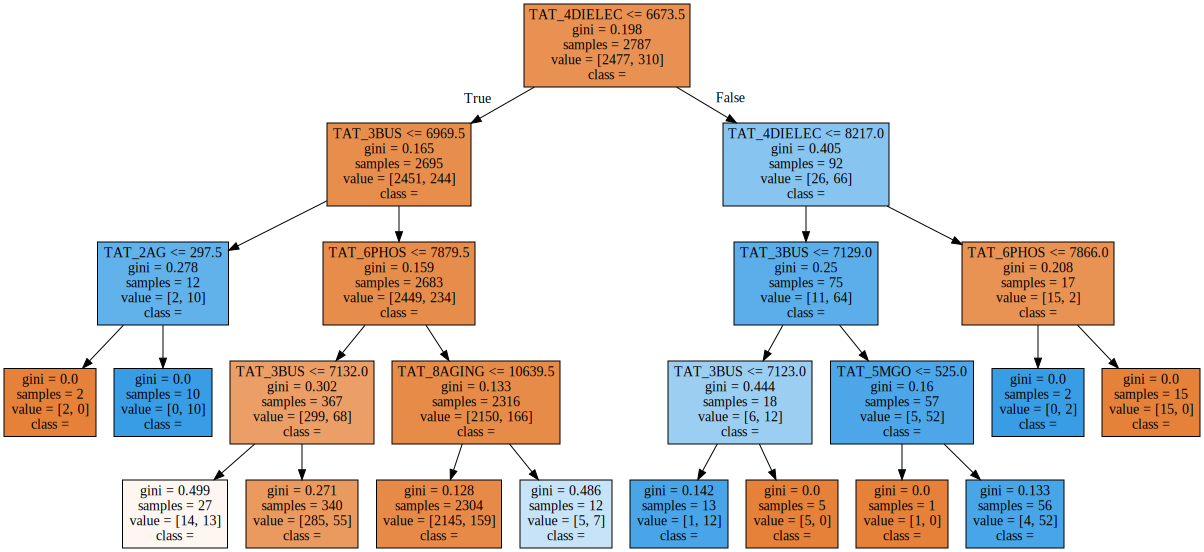

In [35]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['양품','명점'],
               feature_names=v_feature_name, impurity=True, filled=True)


with open('tree_low.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [36]:
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))

print('Accurcay on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.982
Accurcay on test set: 0.917
